In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# %matplotlib inline
###for preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score 

In [3]:
data = pd.read_csv("./Advertising.csv")
print(data.shape)

(200, 5)


# STANDARDIZATION

In [4]:
###standardized each column of the data frame 
###This ensures that the data is centered around zero and that standard deviation is always 1
###Created new dataframe for the standardized values
mean  = data['TV'].mean()
data['nm_TV'] = (data['TV'] - mean) / np.std(data['TV'])

mean  = data['Radio'].mean()
data['nm_Radio'] = (data['Radio'] - mean) / np.std(data['Radio'])

mean  = data['Newspaper'].mean()
data['nm_Newspaper'] = (data['Newspaper'] - mean) / np.std(data['Newspaper'])

standard  = data['Sales'].mean()
data['nm_Sales'] = (data['Sales'] - mean) / np.std(data['Sales'])

### added an extra column composing of all ones to X

data['X'] = 1
new_data = data[['X','nm_TV','nm_Radio','nm_Newspaper','nm_Sales']]
new_data

,X,nm_TV,nm_Radio,nm_Newspaper,nm_Sales
0,1,0.969852,0.981522,1.778945,-1.624396
1,1,-1.197376,1.082808,0.669579,-3.872495
2,1,-1.516155,1.528463,1.783549,-4.083855
3,1,0.052050,1.217855,1.286405,-2.316119
4,1,0.394182,-0.841614,1.281802,-3.392132
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-4.410502
196,1,-0.617035,-1.240003,-1.033598,-4.006997
197,1,0.349810,-0.942899,-1.111852,-3.411346
198,1,1.594565,1.265121,1.640850,-0.971102


# MODEL OPTIMIZATION


### SPLIT DATASET TO TRAINING SET AND TESTING SET

In [5]:
### x --> standardized TV Radio Newspaper clmns; y --> standardized Sales clmns 
x = new_data[['nm_TV','nm_Radio','nm_Newspaper']]
y = new_data['nm_Sales']
x_training, x_testing, y_training, y_testing = train_test_split(x,y, test_size = 0.25 , random_state = 1)



### CREATE FUNCTIONS

In [6]:
### initialize weights: using numpy's random.rand() conveniently picks random numbers between 0 n' 1
### can also set init_w with array of 4 0's
def initialize_weights():
#     init_w=np.random.rand(4)
    init_w=np.array([0.0,0.0,0.0,0.0])
    return init_w

### predicted values y_hat ; y_hat = bias + predictors x X
def predict(weights,x):
    # first weight [0] is the bias 
    bias = weights[0]
    # the rest are weights of predictors
    predictors = weights[1:4]
    y_hat = bias + np.dot(x,predictors)
    return y_hat

# compute cost function and return value to determine accuracy of model
def compute_cost(y,y_hat):
    error_value =y - y_hat
    #cost function formula
    cost_fn = np.sum(np.dot(error_value.T,error_value))/len(y)*2
    return cost_fn

def compute_gradient(x,y,y_hat,learning_rate):
    # separated equation into varying variables to easily understand
    #for the bias 
    d_b=(np.sum(y_hat-y))/len(y)
    #for the predictors
    d_w=(np.dot((y_hat-y),x))/len(y)
    #multiply it(bias n' predictors) with alpha
    derivative_bias=learning_rate*d_b
    derivative_predictors=learning_rate*d_w
    w = np.insert(derivative_predictors,0,derivative_bias,axis=0)
    #return matrix w
    return w

def update_weights(derivatives, weights):
    # update new weights; just subtract product of cf and alpha
    bias = weights[0]
    predictors = weights[1:4]
    n_bias = bias - derivatives[0]
    n_predictors = predictors - derivatives[1:4]
    weights = np.insert(n_predictors,0,n_bias,axis=0)
    # return matrix
    return weights
    
def grad_descent(x,y,alpha,num_iterations):
    # initialize weights; dont insert it on our for loop, otherwise it wont make sense:'(
    weights=initialize_weights()
    counter=0
    item=0
    #create column for iteration and cost n' weight per iteration 
    w_gd_c_matrix=pd.DataFrame(columns=['y_hat','iteration','weights','cost'])
    for each_iter in range(num_iterations):
        #call predict function
        y_hat=predict(weights,x)
        #compute cf
        current_cf=compute_cost(y,y_hat)
        #get the derivative
        partial_derivatives=compute_gradient(x,y,y_hat,alpha)
        #subtract derivative to bias or predictor/s
        temp_weights = weights
        weights = update_weights(partial_derivatives,temp_weights)
        if(counter%1==0):
            w_gd_c_matrix.loc[item]=[y_hat,counter,weights,current_cf]
        item=item+1
        counter +=1
    # return 2 matrices + final weight, dataframe
    weights_per_iter = np.matrix(w_gd_c_matrix[['weights']])
    cost_per_iter =np.matrix(w_gd_c_matrix[['cost']])   
    return weights_per_iter,cost_per_iter,w_gd_c_matrix,weights






### gradient descent for training set

In [12]:
weights_per_iter_training,cost_per_iter_training,w_gd_c_matrix_training,weights_training=grad_descent(x_training,y_training,alpha=0.001,num_iterations=6000)
print(weights_training)
w_gd_c_matrix_training[['iteration','cost']]


[-3.17286856  0.7658388   0.49978682  0.02639514]


,iteration,cost
0,0,22.778007
1,1,22.730923
2,2,22.683938
3,3,22.637053
4,4,22.590268
...,...,...
5995,5995,0.228344
5996,5996,0.228344
5997,5997,0.228343
5998,5998,0.228343


### gradient descent for testing set

In [8]:
weights_per_iter_testing,cost_per_iter_testing,w_gd_c_matrix_testing,weights_testing=grad_descent(x_testing,y_testing,alpha=0.001,num_iterations=6000)
weights_testing
w_gd_c_matrix_testing[['iteration','cost']]


,iteration,cost
0,0,20.384602
1,1,20.345655
2,2,20.306785
3,3,20.267992
4,4,20.229274
...,...,...
5995,5995,0.117823
5996,5996,0.117822
5997,5997,0.117821
5998,5998,0.117820


In [13]:
weights_testing

array([-3.13693616,  0.68505795,  0.61309211, -0.04114238])

# PLOTTING THE MODEL

### 2.1 Scatterplot for training set

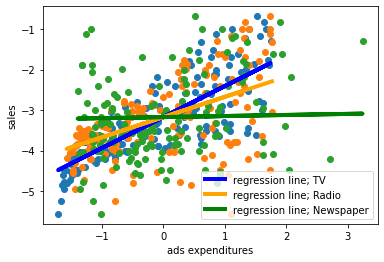

In [16]:
y_axis = y_training
#SCATTER PLOTS
tv = x_training['nm_TV']
plt.scatter(tv,y_axis)

radio = x_training['nm_Radio']
plt.scatter(radio,y_axis)

newspaper = x_training['nm_Newspaper']
plt.scatter(newspaper,y_axis)

## y_hat 
y_hat = weights_training[0] + (weights_training[1]*x_training['nm_TV']) + (weights_training[2]*x_training['nm_Radio']) + (weights_training[3]*x_training['nm_Newspaper'])

y_hat_tv = weights_training[0] + weights_training[1]*x_training['nm_TV']
y_hat_radio = weights_training[0] + weights_training[2]*x_training['nm_Radio']
y_hat_newspaper = weights_training[0] + weights_training[3]*x_training['nm_Newspaper']


fig1 = plt.plot(tv,y_hat_tv, lw=4,c = 'blue',label = 'regression line; TV')
fig2 = plt.plot(radio,y_hat_radio, lw=4,c = 'orange',label = 'regression line; Radio')
fig3 = plt.plot(newspaper,y_hat_newspaper, lw=4,c = 'green',label = 'regression line; Newspaper')
plt.xlabel('ads expenditures')
plt.ylabel('sales')
plt.legend()
plt.show()


### 2.2Scatterplot for testing

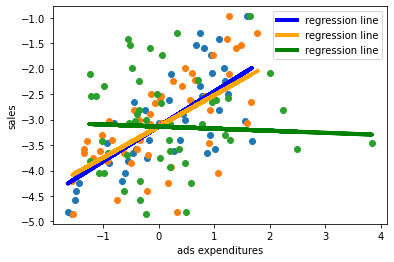

In [15]:
y_axis = y_testing
#SCATTER PLOTS
tv = x_testing['nm_TV']
plt.scatter(tv,y_axis)

radio = x_testing['nm_Radio']
plt.scatter(radio,y_axis)

newspaper = x_testing['nm_Newspaper']
plt.scatter(newspaper,y_axis)

## y_hat 
y_hat = weights_testing[0] + (weights_testing[1]*x_testing['nm_TV']) + (weights_testing[2]*x_testing['nm_Radio']) + (weights_testing[3]*x_testing['nm_Newspaper'])

y_hat_tv = weights_testing[0] + weights_testing[1]*x_testing['nm_TV']
y_hat_radio = weights_testing[0] + weights_testing[2]*x_testing['nm_Radio']
y_hat_newspaper = weights_testing[0] + weights_testing[3]*x_testing['nm_Newspaper']


fig1 = plt.plot(tv,y_hat_tv, lw=4,c = 'blue',label = 'regression line')
fig2 = plt.plot(radio,y_hat_radio, lw=4,c = 'orange',label = 'regression line')
fig3 = plt.plot(newspaper,y_hat_newspaper, lw=4,c = 'green',label = 'regression line')
plt.xlabel('ads expenditures')
plt.ylabel('sales')
plt.legend()
plt.show()


[[array([[-0.00321715],
         [ 0.00094808],
         [ 0.0006043 ],
         [ 0.00040408]])]
 [array([[-0.00643103],
         [ 0.00189498],
         [ 0.00120772],
         [ 0.00080732]])]
 [array([[-0.00964163],
         [ 0.00284073],
         [ 0.00181027],
         [ 0.00120974]])]
 ...
 [array([[-3.17285242],
         [ 0.76583793],
         [ 0.49977574],
         [ 0.02640909]])]
 [array([[-3.17286049],
         [ 0.76583837],
         [ 0.49978128],
         [ 0.02640211]])]
 [array([[-3.17286856],
         [ 0.7658388 ],
         [ 0.49978682],
         [ 0.02639514]])]]


## Optimal Weights and r2 score

In [24]:
#optimal weights
print("optimal weights:",weights_training)
#plug into the linear model
y_hat = weights_training[0] + (weights_training[1]*x_training['nm_TV']) + (weights_training[2]*x_training['nm_Radio']) + (weights_training[3]*x_training['nm_Newspaper'])
print("r2 score:",r2_score(y_training,y_hat))
print("cost per iteration: ",cost_per_iter_training)

optimal weights: [[-3.17286856]
 [ 0.7658388 ]
 [ 0.49978682]
 [ 0.02639514]]
r2 score: 0.8901082496651995
cost per iteration:  [[22.77800702]
 [22.73092257]
 [22.68393813]
 ...
 [ 0.22834326]
 [ 0.22834268]
 [ 0.2283421 ]]


# Different Learning Rates

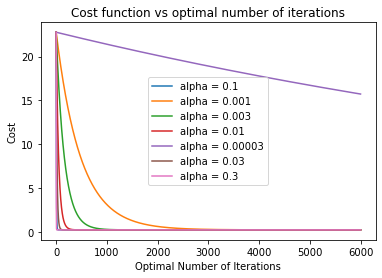

In [29]:
# plot_cost function is this
weights_per_iter_a1,cost_per_iter_a1,w_gd_c_matrix_a1,weights_a1=grad_descent(x_training,y_training,alpha=0.1,num_iterations=6000)

weights_per_iter_a2,cost_per_iter_a2,w_gd_c_matrix_a2,weights_a2=grad_descent(x_training,y_training,alpha=0.001,num_iterations=6000)

weights_per_iter_a3,cost_per_iter_a3,w_gd_c_matrix_a3,weights_a3=grad_descent(x_training,y_training,alpha=0.003,num_iterations=6000)

weights_per_iter_a4,cost_per_iter_a4,w_gd_c_matrix_a4,weights_a4=grad_descent(x_training,y_training,alpha=0.01,num_iterations=6000)

weights_per_iter_a5,cost_per_iter_a5,w_gd_c_matrix_a5,weights_a5=grad_descent(x_training,y_training,alpha=0.00003,num_iterations=6000)

weights_per_iter_a6,cost_per_iter_a6,w_gd_c_matrix_a6,weights_a6=grad_descent(x_training,y_training,alpha=0.03,num_iterations=6000)

weights_per_iter_a7,cost_per_iter_a7,w_gd_c_matrix_a7,weights_a7=grad_descent(x_training,y_training,alpha=0.3,num_iterations=6000)

plt.plot(w_gd_c_matrix_a1['iteration'],w_gd_c_matrix_a1['cost'],label ="alpha = 0.1")
plt.plot(w_gd_c_matrix_a2['iteration'],w_gd_c_matrix_a2['cost'],label ="alpha = 0.001")
plt.plot(w_gd_c_matrix_a3['iteration'],w_gd_c_matrix_a3['cost'],label ="alpha = 0.003")
plt.plot(w_gd_c_matrix_a4['iteration'],w_gd_c_matrix_a4['cost'],label ="alpha = 0.01")
plt.plot(w_gd_c_matrix_a5['iteration'],w_gd_c_matrix_a5['cost'],label ="alpha = 0.00003")
plt.plot(w_gd_c_matrix_a6['iteration'],w_gd_c_matrix_a6['cost'],label ="alpha = 0.03")
plt.plot(w_gd_c_matrix_a7['iteration'],w_gd_c_matrix_a7['cost'],label ="alpha = 0.3")

plt.legend()
plt.ylabel("Cost")
plt.xlabel("Optimal Number of Iterations")
plt.title("Cost function vs optimal number of iterations")

plt.show()